In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Input, LSTM, Dense

In [43]:
!gdown 10xd_Zk0Ld_GlonTOFLNpuLyThOyi-hvq

Downloading...
From (original): https://drive.google.com/uc?id=10xd_Zk0Ld_GlonTOFLNpuLyThOyi-hvq
From (redirected): https://drive.google.com/uc?id=10xd_Zk0Ld_GlonTOFLNpuLyThOyi-hvq&confirm=t&uuid=499d5c12-750c-4eba-9d9a-b08aa2634c4e
To: /Users/davidhristov/Desktop/Intro to Data Science/DataScience/Auditory/Aud9-Advanced Neural Networks/bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv
100%|████████████████████████████████████████| 318M/318M [00:49<00:00, 6.46MB/s]


In [44]:
df = pd.read_csv('bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv')

In [45]:
df

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
4857372,1617148560,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339
4857373,1617148620,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508
4857374,1617148680,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496
4857375,1617148740,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202


In [46]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='s')

In [47]:
df.set_index(keys=['Timestamp'], inplace=True)

In [48]:
df.sort_index(inplace=True)

In [49]:
df = df["2021-03-20 00:00:00":].copy(deep=True)

In [50]:
df.ffill(inplace=True)

In [51]:
df.head(20) #po 1 minuta odi

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2021-03-20 00:00:00,58029.94,58056.38,57984.41,57984.41,0.586071,3.401285e+04,58035.397366
2021-03-20 00:01:00,57984.41,58018.74,57850.00,57898.50,11.624454,6.737002e+05,57955.426395
2021-03-20 00:02:00,57898.49,57923.95,57815.61,57902.49,7.170489,4.149455e+05,57868.515170
2021-03-20 00:03:00,57971.49,58183.82,57971.49,58093.58,42.251243,2.456207e+06,58133.373299
2021-03-20 00:04:00,58077.09,58137.00,58020.43,58020.43,6.994187,4.066059e+05,58134.832915
2021-03-20 00:05:00,58035.10,58038.57,57942.98,57942.98,1.028374,5.964346e+04,57997.809090
2021-03-20 00:06:00,57930.81,57989.83,57930.81,57970.36,1.639792,9.503422e+04,57955.063951
2021-03-20 00:07:00,57966.69,57966.69,57903.37,57944.74,1.918871,1.111673e+05,57933.706854
2021-03-20 00:08:00,57993.07,58063.10,57978.19,58062.11,0.538043,3.119902e+04,57986.095548


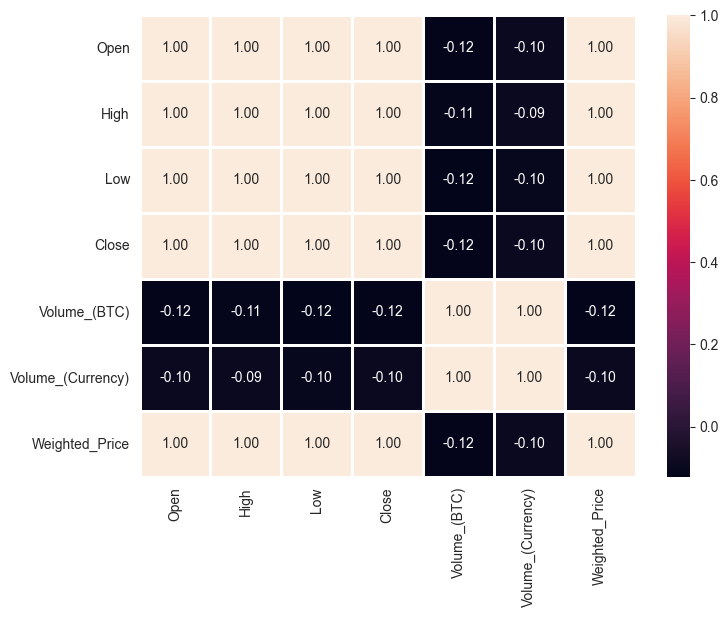

In [52]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, fmt='.2f', linewidths=2)
plt.show()

In [53]:
df = df[['Close']].copy()

In [54]:
#1 opcija 

for i in range(3,0,-1):   # Start at 3, stop at 0 (exclusive), step -1
    df[f'Close_lag{i}'] = df['Close'].shift(i)

In [55]:
#2 opcija 

#lag = 3

#periods = range(lag, 0, -1) 

#df.shift(periods=periods)

In [56]:
df

,Close,Close_lag3,Close_lag2,Close_lag1
Timestamp,,,,
2021-03-20 00:00:00,57984.41,NaN,NaN,NaN
2021-03-20 00:01:00,57898.50,NaN,NaN,57984.41
2021-03-20 00:02:00,57902.49,NaN,57984.41,57898.50
2021-03-20 00:03:00,58093.58,57984.41,57898.50,57902.49
2021-03-20 00:04:00,58020.43,57898.50,57902.49,58093.58
...,...,...,...,...
2021-03-30 23:56:00,58686.00,58698.50,58739.95,58714.31
2021-03-30 23:57:00,58685.81,58739.95,58714.31,58686.00
2021-03-30 23:58:00,58723.84,58714.31,58686.00,58685.81


In [57]:
df.dropna(axis=0, inplace=True) #drop rows with null values 

In [58]:
df.head()

,Close,Close_lag3,Close_lag2,Close_lag1
Timestamp,,,,
2021-03-20 00:03:00,58093.58,57984.41,57898.50,57902.49
2021-03-20 00:04:00,58020.43,57898.50,57902.49,58093.58
2021-03-20 00:05:00,57942.98,57902.49,58093.58,58020.43
2021-03-20 00:06:00,57970.36,58093.58,58020.43,57942.98
2021-03-20 00:07:00,57944.74,58020.43,57942.98,57970.36


In [59]:
x = df.drop(columns='Close')
y = df['Close']

In [60]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=False) # obavezno da ne se mesaat podatocite

In [61]:
scaler = MinMaxScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

y_train = scaler.fit_transform(y_train.values.reshape(-1,1))

In [62]:
len(x_train[0])

3

In [63]:
x_train.shape

(12670, 3)

In [64]:
x_train

array([[0.80185157, 0.7927609 , 0.7931831 ],
       [0.7927609 , 0.7931831 , 0.81340354],
       [0.7931831 , 0.81340354, 0.80566308],
       ...,
       [0.49047547, 0.48998449, 0.49409545],
       [0.48998449, 0.49409545, 0.48912949],
       [0.49409545, 0.48912949, 0.48770732]])

In [65]:
#To reshape x_train from (12670, 3) to (12670, 3, 1), you need to add a third dimension. 
# This is commonly done when preparing data for models like RNNs, LSTMs, or CNNs, which expect 3D input (samples, timesteps, features).

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# x_train.shape[0] = number of samples (12670)
# x_train.shape[1] = timesteps (3)
# 1 = the number of features

In [66]:
x_train.shape 

# The 3D shape (samples, timesteps, features) - 3d shape is used for RNNs

# ima 12670 vrednosti (Redici),
# 3 columns: Each sample uses 3 time steps (e.g., the last 3 days) i 
# 1 feature per time step: Each time step contains 1 value (e.g., the Close value for that day).

(12670, 3, 1)

In [67]:
x_train

array([[[0.80185157],
        [0.7927609 ],
        [0.7931831 ]],

       [[0.7927609 ],
        [0.7931831 ],
        [0.81340354]],

       [[0.7931831 ],
        [0.81340354],
        [0.80566308]],

       ...,

       [[0.49047547],
        [0.48998449],
        [0.49409545]],

       [[0.48998449],
        [0.49409545],
        [0.48912949]],

       [[0.49409545],
        [0.48912949],
        [0.48770732]]])

In [94]:
model = Sequential()

#vlezen sloj - imam input_Shape obavezno 
model.add(LSTM(8, 
                input_shape=(x_train.shape[1], x_train.shape[2]),     
               return_sequences=True, 
               activation='relu'))

#hidden sloj 
model.add(LSTM(4,activation='relu'))

#output sloj
model.add(Dense(1, activation='linear')) #1 izlez iamme - realen broj i linearna aktivaciska funkcija 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [95]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])

In [96]:
history = model.fit(x_train, y_train, batch_size=16 , epochs = 30, validation_split=0.2, shuffle=False) #probaj so epochs=10, batch_size = 16

Epoch 1/30
634/634 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.2281 - mean_squared_error: 0.2281 - val_loss: 0.0053 - val_mean_squared_error: 0.0053
Epoch 2/30
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 898us/step - loss: 7.1616e-04 - mean_squared_error: 7.1616e-04 - val_loss: 6.4032e-04 - val_mean_squared_error: 6.4032e-04
Epoch 3/30
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 887us/step - loss: 5.0148e-04 - mean_squared_error: 5.0148e-04 - val_loss: 1.5389e-04 - val_mean_squared_error: 1.5389e-04
Epoch 4/30
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 895us/step - loss: 5.6097e-04 - mean_squared_error: 5.6097e-04 - val_loss: 6.8441e-05 - val_mean_squared_error: 6.8441e-05
Epoch 5/30
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 921us/step - loss: 5.6392e-04 - mean_squared_error: 5.6392e-04 - val_loss: 7.8558e-05 - val_mean_squared_error: 7.8558e-05
Epoch 6/30
634/634 ━━━━━━━━━━━━━━━━━━━━ 1s 937us/step - loss: 5.9417e-04 - mean_squared_error: 5.9417e-04 - val_loss: 9.3192e-05 - val_mean_squared_error: 9.3192e-05
Epoch 7/30
634/634 ━━━

<Axes: >

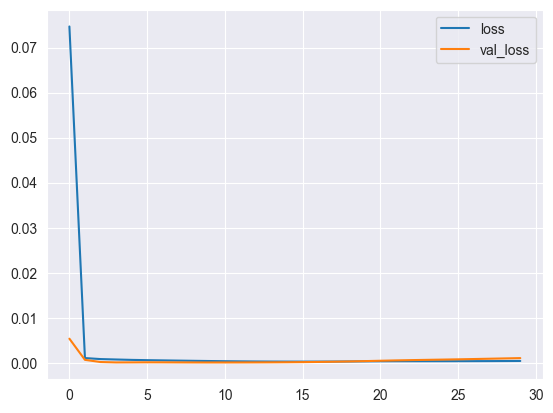

In [97]:
sns.lineplot(history.history['loss'], label='loss')
sns.lineplot(history.history['val_loss'], label='val_loss')

In [98]:
y_pred = model.predict(x_test)

99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step


In [99]:
y_pred

array([[0.48810205],
       [0.48640755],
       [0.48320848],
       ...,
       [0.76743126],
       [0.7673079 ],
       [0.7693255 ]], dtype=float32)

In [100]:
y_pred = scaler.inverse_transform(y_pred)

In [101]:
r2_score(y_test, y_pred)

0.6244885056626581